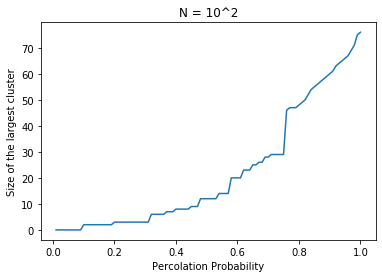

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from random import random

L=10
N=L**2
empty=-N-1

ptr=np.zeros(N, dtype=int)              # array of pointers
nn=np.zeros((N, 4), dtype=int)          # nearest neighbors
order=np.zeros(N, dtype=int)            # occupation order

def boundaries():
        for i in range(N):
              nn[i, 0]=(i+1)%N
              nn[i, 1]=(i+N-1)%N
              nn[i, 2]=(i+L)%N
              nn[i, 3]=(i+N-L)%N
              if i%L==0: 
                    nn[i, 1]=i+L-1
              if (i+1)%L==0:
                    nn[i, 0]=i-L+1

def permutation():
        j=0
        temp=0
        for i in range(N):
              order[i]=i
              for i in range(N):
                    j=int(i+(N-i)*random())
                    temp=np.copy(order[i])
                    order[i]=order[j]
                    order[j]=temp

def findroot(i):
        k=j=i
        while ptr[k]>0:
            ptr[j]=np.copy(ptr[k])
            j=k
            k=ptr[k]
        return k

def percolate():
        big=0
        X=[]
        Y=[]
        for i in range(N): 
              ptr[i]=empty
        for i in range(N):
              r1=s1=np.copy(order[i])
              ptr[s1]=-1    
              for j in range(4):
                    s2=np.copy(nn[s1, j])
                    if ptr[s2] != empty:
                          r2=findroot(s2)
                          if (r2!=r1):
                                if ptr[r1]>ptr[r2]:
                                       ptr[r2]=ptr[r2]+ptr[r1]
                                       ptr[r1]=r2
                                       r1=np.copy(r2)
                                else:
                                       ptr[r1]=ptr[r1]+ptr[r2]
                                       ptr[r2]=r1
                                if -ptr[r1]>big: 
                                       big=-np.copy(ptr[r1])
              X+=[(i+1.)/N, ]
              Y+=[big, ]
        plt.plot(X, Y, '-')
        plt.xlabel("Percolation Probability")
        plt.ylabel("Size of the largest cluster")
        plt.title("N = 10^2")
        plt.show()

boundaries()
permutation()
percolate()

empty network created


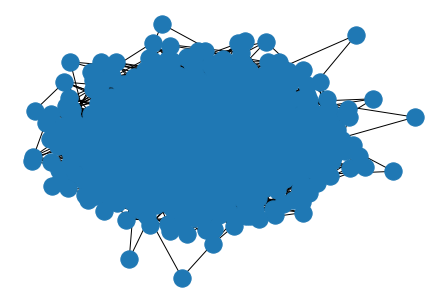

In [0]:
import matplotlib.pyplot as plt
from networkx import nx
import random

class Cluster:
      def __init__(self, size, nodes, label):
        self.size = size; #size of the cluster: size = int
        self.nodes = nodes; #nodes in the cluster: nodes = set()  (a set)
        self.label = label; #label of a cluster: label = int (c)

#1. Start with an empty network with no occupied vertices. Let c = 0 be the number of clusters
#in the network initially. Choose at random an order in which the vertices will be added to
#the network.
N = 10**3;
G = nx.fast_gnp_random_graph(N, 0.01, seed=None, directed=False)
print("empty network created")
#print("node neighbors")
#for n in G.nodes:
#     print("node:", n);
#     print("neighbors:");
#     for i in G.neighbors(n):
#          print(i);

#nx.draw(G)
#plt.show()

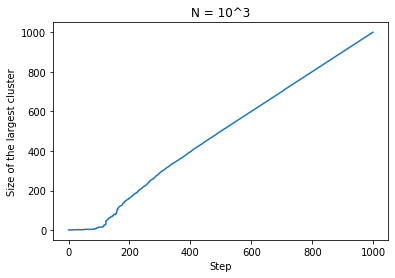

In [0]:
#2. Add the next vertex in the chosen order, initially with no edges. This vertex is a cluster in
#its own right, so increase c by one and label the vertex with label c to indicate which cluster
#it belongs to. Also make a note that cluster c has size 1.
orders = list(range(0,N))
random.shuffle(orders) #list of random orders
c = 0
largest = 0
clusters = {}; # a dictionary with {...label -> Cluster(size, nodes, label)...}
nodes = set() # nodes added
edges = set() # edges added
attrs = {"added":False,'label':0}
nodes_attrs = {i:attrs for i in range(N)}
nx.set_node_attributes(G, nodes_attrs)
#3. Go through the edges attached to this vertex one by one. For each edge determine whether
#the vertex at the other end has already been added to the network. If it has, add the edge to
#the network.
#4. As each edge is added, examine the cluster labels of the vertices at either end. If they are
#the same, do nothing. If they are different, choose one of the clusters and relabel all its
#vertices to have the same label as the other cluster. Update the record of the size of the
#cluster to be equal to the sum of the sizes of the two clusters from which it was formed.
#5. Repeat from step 2 until all vertices have been added.
X=[]
Y=[]
for i in range(N): 
      X +=[i,]
      c += 1;                             # increase c
      n = orders[i];                      # the node chosen from random order -- nth node
      nclus = Cluster(1, set([n]), c)     # starting cluster -- itself, size 1
      nodes.add(n);                       # add the chosen node to node added
      G.nodes[n]['added'] = True;         # mark the node added
      G.nodes[n]['label'] = c;            # mark the node's label as c
      neighbor_added = False;
      for neighbor in G.neighbors(n):     # search through neighbors
         #print("the node", n);
         #print("this neighbor",neighbor);
         #print(nodes);
          if G.nodes[neighbor]["added"] == True:           # if the neighbor is added
                neighbor_added = True;
               #print("yes")
               #print(G.nodes[neighbor])
                edge1 = (n, neighbor);
                edge2 = (neighbor,n );
                edges.add(edge1);
                edges.add(edge2);                                         # add the edge to the neighbor
                if G.nodes[neighbor]['label'] != c:                   # if the labels aren't the same 
                       neighbor_label = G.nodes[neighbor]['label']         # neighbors' label  
                       union = nclus.nodes.union(clusters[neighbor_label].nodes)
                       nclus.nodes = union;
                       for neighbor_set_node in clusters[neighbor_label].nodes: 
                              G.nodes[neighbor_set_node]['label'] = c;
                       del clusters[neighbor_label]
                       clusters[c] = nclus
                       nclus.size = len(nclus.nodes);
                       if nclus.size > largest:
                          largest = nclus.size        # update largest if cluster of neighbor's label is the largest
      if neighbor_added == False:
          clusters[c] = nclus
          if largest == 0:
               largest = 1
      Y += [largest,]
     #print("NODE");
     #print (n);
     #print (G.nodes[n]);
     #print (clusters)
     #for key in clusters:
     #   print("label:", key)
     #   print("nodes:", clusters[key].nodes)
     #   for n2 in clusters[key].nodes:
     #       print("each-node-label:", G.nodes[n2]["label"])
     #       print("size:", clusters[key].size)
     #print("largest",largest)'''
plt.plot(X, Y, '-')
plt.xlabel("Step")
plt.ylabel("Size of the largest cluster")
plt.title("N = 10^3")
plt.show()


In [0]:
'''def cluster_combine(target, to_combine):
      label = target.label;
      for n in to_combine.nodes:
            G.nodes[n]['label'] = label;
      target.nodes = target.nodes.union(to_combine.nodes);
      target.size = len(target.nodes);
      del clusters[to_combine.label];
'''

In [0]:
#copy
#2. Add the next vertex in the chosen order, initially with no edges. This vertex is a cluster in
#its own right, so increase c by one and label the vertex with label c to indicate which cluster
#it belongs to. Also make a note that cluster c has size 1.
orders = list(range(0,N))
random.shuffle(orders) #list of random orders
c = 0
largest = 0
clusters = {}; # a dictionary with {...label -> Cluster(size, nodes, label)...}
nodes = set() # nodes added
edges = set() # edges added
attrs = {"added":False,'label':0}
nodes_attrs = {i:attrs for i in range(N)}
nx.set_node_attributes(G, nodes_attrs)
#3. Go through the edges attached to this vertex one by one. For each edge determine whether
#the vertex at the other end has already been added to the network. If it has, add the edge to
#the network.
#4. As each edge is added, examine the cluster labels of the vertices at either end. If they are
#the same, do nothing. If they are different, choose one of the clusters and relabel all its
#vertices to have the same label as the other cluster. Update the record of the size of the
#cluster to be equal to the sum of the sizes of the two clusters from which it was formed.
#5. Repeat from step 2 until all vertices have been added.

'''def cluster_combine(target, to_combine):
      label = target.label;
      for n in to_combine.nodes:
            G.nodes[n]['label'] = label;
      target.nodes = target.nodes.union(to_combine.nodes);
      target.size = len(target.nodes);
      del clusters[to_combine.label];
'''
for i in range(N): 
      c += 1;                             # increase c
      n = orders[i];                      # the node chosen from random order -- nth node
      nclus = Cluster(1, set([n]), c)     # starting cluster -- itself, size 1
      nodes.add(n);                       # add the chosen node to node added
      G.nodes[n]['added'] = True;         # mark the node added
      G.nodes[n]['label'] = c;            # mark the node's label as c
      neighbor_added = False;
      this_cluster; 
      for neighbor in G.neighbors(n):     # search through neighbors
          print("the node", n);
          print("this neighbor",neighbor);
          print(nodes);
          if neighbor in nodes:           # if the neighbor is added
                neighbor_added = True;
                print("yes")
                print(G.nodes[neighbor])
                edge1 = (n, neighbor);
                edge2 = (neighbor,n );
                edges.add(edge1);
                edges.add(edge2);                                         # add the edge to the neighbor
                if G.nodes[neighbor]['label'] != label:                   # if the labels aren't the same 
                       neighbor_label = G.nodes[neighbor]['label']         # neighbors' label  
                       union = nclus.nodes.union(clusters[neighbor_label].nodes)
                       nclus.nodes = union;
                       for neighbor_set_node in clusters[neighbor_label].nodes: 
                              G.nodes[neighbor_set_node]['label'] = c;
                       del clusters[neighbor_label]
                       clusters[c] = nclus
                       nclus.size = len(nclus.nodes);
                       if nclus.size > largest:
                          largest = nclus.size        # update largest if cluster of neighbor's label is the largest

      if neighbor_added == False:
          clusters[c] = nclus
      print("NODE");
      print (n);
      print (G.nodes[n]);
      print (clusters)
      for key in clusters:
        print("label:", key)
        print("nodes:", clusters[key].nodes)
        for n2 in clusters[key].nodes:
            print("each-node-label:", G.nodes[n2]["label"])
        print("size:", clusters[key].size)
